# AI Chanllenge 自动驾驶视觉感知
- 基于yolov3的物体检测和可行驶区域分割

#### 0. 预处理

- 模块导入，自定义相关常量
- 生成简化版的labels json文件，防止读取内存时占用过大

In [1]:
import os
import skimage
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
PATH_Labels = './data/bdd100k_labels_release/bdd100k/labels'
PATH_Train = './data/bdd100k_images/bdd100k/images/100k/train'
PATH_Test = './data/bdd100k_images/bdd100k/images/100k/test'
PATH_Val = './data/bdd100k_images/bdd100k/images/100k/val'
PATH_Yolov3cfg_ori = './config/yolov3.cfg'
PATH_Yolov3cfg_custom = './config/yolov3-custom-classes.cfg'
PATH_Class_names = './data/class.names'

NUM_Classes = 10

In [5]:
# 生成简化labels的json文件，防止读取labels占用内存过大
from utils.simplify_labels import *
gen_simple_labels(PATH_Labels)

Simplified labels files already exist!


### 1. 查看labels文件

In [ ]:
# train_labels_df = pd.read_json(os.path.join(PATH_Labels, 'simple_train_labels.json'))
# train_labels_df.head()

val_labels_df = pd.read_json(os.path.join(PATH_Labels, 'simple_val_labels.json'))
val_labels_df.head()


### 2. 加载模型

In [ ]:
from models import *

model_custom = Darknet(PATH_Yolov3cfg_custom, img_size=416)
model_ori = Darknet(PATH_Yolov3cfg_ori, img_size=640)

print(model_custom)

In [ ]:
print(model_ori)

# 一些试错代码

In [ ]:
os.listdir(PATH_Val)[:5]

In [26]:
import json
with open(os.path.join(PATH_Labels, 'simple_val_labels.json'), 'r') as f:
    labels = json.load(f)
    
names_val, labels_val = prepare_labels(os.path.join(PATH_Labels, 'simple_val_labels.json'), 
                            PATH_Class_names)

In [28]:
labels[1]

{'name': 'b1c81faa-3df17267.jpg',
 'attributes': {'weather': 'clear', 'scene': 'highway', 'timeofday': 'night'},
 'labels': [{'category': 'car',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 819.464053,
    'y1': 280.082505,
    'x2': 889.23726,
    'y2': 312.742305},
   'id': 51},
  {'category': 'car',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1027.299139,
    'y1': 290.47426,
    'x2': 1052.536255,
    'y2': 306.804159},
   'id': 52},
  {'category': 'traffic sign',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1061.443474,
    'y1': 234.061879,
    'x2': 1134.185754,
    'y2': 265.237142},
   'id': 53},
  {'category': 'traf

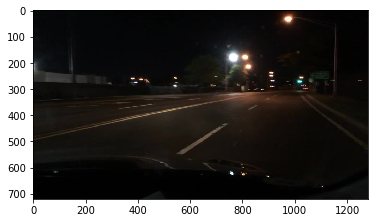

In [36]:
imgx= plt.imread(os.path.join(PATH_Val, 'b1c81faa-3df17267.jpg'))
imgx.shape
plt.imshow(imgx)

In [35]:
labels_val[1]

array([[   2.       ,  854.3506565,  296.412405 ,   69.773207 ,
          32.6598   ],
       [   2.       , 1039.917697 ,  298.6392095,   25.237116 ,
          16.329899 ],
       [   7.       , 1097.814614 ,  249.6495105,   72.74228  ,
          31.175263 ],
       [   6.       , 1017.649652 ,  271.9175675,   25.237116 ,
          16.329901 ]])

In [39]:
valdata[1][2]

[ 819.464053 1027.299139 1061.443474 1005.031094] [280.082505 290.47426  234.061879 263.752617] [ 889.23726  1052.536255 1134.185754 1030.26821 ] [312.742305 306.804159 265.237142 280.082518]


tensor([[2.0000, 0.6675, 0.4503, 0.0545, 0.0255],
        [2.0000, 0.8124, 0.4521, 0.0197, 0.0128],
        [7.0000, 0.8577, 0.4138, 0.0568, 0.0244],
        [6.0000, 0.7950, 0.4312, 0.0197, 0.0128],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],


In [6]:
valdata = ListDataset(PATH_Val,
                      os.path.join(PATH_Labels, 'simple_val_labels.json'),
                      PATH_Class_names)

In [3]:
import os
import numpy as np
import copy
import torch

from torch.utils.data import Dataset
from PIL import Image
from utils.simplify_labels import prepare_labels

from skimage.transform import resize

class ListDataset(Dataset):
    def __init__(self, img_path, label_path, classname_path, img_size=416):
        self.img_path = img_path
        self.label_path = label_path
        self.classname_path = classname_path
        self.img_names = os.listdir(self.img_path)
        _, self.img_labels = prepare_labels(self.label_path, self.classname_path)
        self.img_shape = (img_size, img_size)
        self.max_objects = 50

    def __getitem__(self, index):

        #---------
        #  Image
        #---------

        img_path = os.path.join(self.img_path, self.img_names[index])
        img = np.array(Image.open(img_path))

        # Handles images with less than three channels
        while len(img.shape) != 3:
            index += 1
            img_path = os.path.join(self.img_path, self.img_names[index])
            img = np.array(Image.open(img_path))

        h, w, _ = img.shape
        dim_diff = np.abs(h - w)
        # Upper (left) and lower (right) padding
        pad1, pad2 = dim_diff // 2, dim_diff - dim_diff // 2
        # Determine padding
        pad = ((pad1, pad2), (0, 0), (0, 0)) if h <= w else ((0, 0), (pad1, pad2), (0, 0))
        # Add padding
        input_img = np.pad(img, pad, 'constant', constant_values=128) / 255.
        padded_h, padded_w, _ = input_img.shape
        # Resize and normalize
        input_img = resize(input_img, (*self.img_shape, 3), mode='reflect')
        # Channels-first
        input_img = np.transpose(input_img, (2, 0, 1))
        # As pytorch tensor
        input_img = torch.from_numpy(input_img).float()

        #---------
        #  Label
        #---------

        labels = copy.deepcopy(self.img_labels[index])
        # Extract coordinates for unpadded + unscaled image
        x1 = labels[:, 1] - labels[:, 3]/2
        y1 = labels[:, 2] - labels[:, 4]/2
        x2 = labels[:, 1] + labels[:, 3]/2
        y2 = labels[:, 2] + labels[:, 4]/2
        print(x1,y1,x2,y2)
        # Adjust for added padding
        x1 += pad[1][0]
        y1 += pad[0][0]
        x2 += pad[1][0]
        y2 += pad[0][0]
        # Calculate ratios from coordinates
        labels[:, 1] = ((x1 + x2) / 2) / padded_w
        labels[:, 2] = ((y1 + y2) / 2) / padded_h
        labels[:, 3] /= padded_w
        labels[:, 4] /= padded_h
        # Fill matrix
        filled_labels = np.zeros((self.max_objects, 5))
        if labels is not None:
            filled_labels[range(len(labels))[:self.max_objects]] = labels[:self.max_objects]
        filled_labels = torch.from_numpy(filled_labels)

        return img_path, input_img, filled_labels

    def __len__(self):
        return len(self.img_names)

In [ ]:
1/torch.sigmoid(torch.tensor(-3.8))

In [7]:
from torch.utils.data import Subset
subval_data = Subset(valdata, range(9000))

In [12]:
subval_data[1]

[ 819.464053 1027.299139 1061.443474 1005.031094] [280.082505 290.47426  234.061879 263.752617] [ 889.23726  1052.536255 1134.185754 1030.26821 ] [312.742305 306.804159 265.237142 280.082518]


('./data/bdd100k_images/bdd100k/images/100k/val\\b1c81faa-3df17267.jpg',
 tensor([[[0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          ...,
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020]],
 
         [[0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          ...,
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020]],
 
         [[0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
          [0.5020, 0.5020, 0.5020

In [21]:
output_try = torch.tensor([[2.0000, 0.6675, 0.4503, 0.0545, 0.0255],
         [2.0000, 0.8124, 0.4521, 0.0197, 0.0128],
         [7.0000, 0.8577, 0.4138, 0.0568, 0.0244],
         [6.0000, 0.7950, 0.4312, 0.0197, 0.0128]])
output_try

tensor([[2.0000, 0.6675, 0.4503, 0.0545, 0.0255],
        [2.0000, 0.8124, 0.4521, 0.0197, 0.0128],
        [7.0000, 0.8577, 0.4138, 0.0568, 0.0244],
        [6.0000, 0.7950, 0.4312, 0.0197, 0.0128]])

In [23]:
output_try[:,1:3] * 13

tensor([[ 8.6775,  5.8539],
        [10.5612,  5.8773],
        [11.1501,  5.3794],
        [10.3350,  5.6056]])